# Notebook 02 – Data Loading and Preprocessing

## Introduction

This notebook is for preparing the Alzheimer's disease dataset so it can be used in analysis and machine learning. In this notebook we:
- Load the dataset and take a first look at it
- Find and handle missing values
- Remove any duplicate rows
- Convert text categories into numbers so the computer can understand them
- Organize the data in a way that makes it ready for analysis

The cleaned data we create here will be used in the next notebook for exploring patterns and building models.

## Set up environment

We use our Python setup file to initialize folder structure and visual style.  
This ensures that our workspace is consistent across all notebooks.

In [21]:
import sys
sys.path.append("../utils")  # Add path to module

# Load the project setup script which initializes folder structure and styling
from setup_notebook import *

# Set up necessary directories and define default plotting style
init_environment()

Environment setup complete.


In [23]:
# Code to run:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Load the original dataset
dataframe = pd.read_csv("../data/alzheimers_disease_raw_data.csv")
dataframe.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Extract – Load the Dataset

In this step, we load the raw Alzheimer's dataset into our project using a custom helper function from our setup.py script. The dataset has not yet been cleaned or processed — this is the original version as collected.
Our helper function uses pandas to read the CSV file and automatically provides basic metadata, including:

- The file path from which the data was loaded  
- The number of rows and columns present in the dataset  

This step ensures that we have successfully accessed the correct dataset and gives us an initial understanding of its structure and scale before we proceed with cleaning and transformation.

In [26]:
# Load the Alzheimer's dataset and save as variable ´df´
# This function also confirms the shape of the data after loading
df = load_csv("../data/alzheimers_disease_raw_data.csv")

Loaded data from ../data/alzheimers_disease_raw_data.csv with shape (2149, 35)


## Alternative Approach - Load libraries

Before working with the data, we first import the necessary Python libraries:

- **pandas** is used for handling tabular data
- **numpy** helps with numerical operations
- **matplotlib.pyplot** and **seaborn** are used for visualizing data We then use read_csv() to load the dataset into a DataFrame called df, and head() to preview the first 5 rows. This setup is important because it gives us the tools to clean, explore, and later model the data.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [31]:
# We load the dataset
dataframe = pd.read_csv("../data/alzheimers_disease_raw_data.csv")
dataframe.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


## Initial Data Inspection

Now that the dataset is loaded, we perform an initial inspection to understand its structure and contents. This helps us identify potential issues early and plan the cleaning steps that follow. We focus on:
- The number of rows and columns
- The data types of each column
- The presence of missing values
- Descriptive statistics for both numeric and categorical variables
- A sample of the first few records

To do this efficiently, we use the quick_overview function from the setup_notebook.py script. This function brings together several important checks in one place by using the following pandas methods:
- df.shape – shows the number of rows and columns  
- df.info(verbose=False, show_counts=True) – shows data types and non-null counts  
- df.info() – provides full structure and memory usage  
- df.describe(include="all") – provides summary statistics for all columns  
- df.head() – displays the first 5 rows of the dataset  

By combining these into one function, we get a clear and structured overview of the dataset. This step is essential to understand what kind of data we are working with before we begin cleaning, transformation, or modeling.

In [34]:
# Print essential information about the dataset
# Includes data types, column count, row count, and a preview of the data
quick_overview(df)

----- Dataset Shape -----
Rows: 2149, Columns: 35

----- Data Types and Non-Null Counts -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Columns: 35 entries, PatientID to DoctorInCharge
dtypes: float64(12), int64(22), object(1)
memory usage: 587.7+ KB

----- Overview of dataset -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActi

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,XXXConfid
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2149
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,7.051081,0.252210,0.144253,0.150768,0.200558,0.092601,0.148906,134.264774,89.847836,225.197519,124.335944,59.463533,228.281496,14.755132,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653,NaN
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,1.763573,0.434382,0.351428,0.357906,0.400511,0.289940,0.356079,25.949352,17.592496,42.542233,43.366584,23.139174,101.986721,8.613151,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214,NaN
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,4.002629,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,60.000000,150.093316,50.230707,20.003434,50.407194,0.005312,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,5.482997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.000000,74.000000,190.252963,87.195798,39.095698,137.583222,7.167602,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,7.115646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.000000,91.000000,225.086430,123.342593,59.768237,230.301983,14.441660,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,8.562521,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.000000,105.000000,262.031657,161.733733,78.939050,314.839046,22.161028,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN



----- First 5 Rows -----


,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,HeadInjury,Hypertension,SystolicBP,DiastolicBP,CholesterolTotal,CholesterolLDL,CholesterolHDL,CholesterolTriglycerides,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,0,0,1,1,0,0,142,72,242.366840,56.150897,33.682563,162.189143,21.463532,6.518877,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,0,0,0,0,0,0,115,64,231.162595,193.407996,79.028477,294.630909,20.613267,7.118696,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,9.673574,1,0,0,0,0,0,99,116,284.181858,153.322762,69.772292,83.638324,7.356249,5.895077,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,8.392554,0,0,0,0,0,0,118,115,159.582240,65.366637,68.457491,277.577358,13.991127,8.965106,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,5.597238,0,0,0,0,0,0,94,117,237.602184,92.869700,56.874305,291.198780,13.517609,6.045039,0,0,0.014691,0,0,1,1,0,0,XXXConfid


### Output (quick_overview(df))

This section gives us a full first look at the dataset. It combines the results from pandas methods like df.shape, df.info, df.describe, and df.head. This helps us understand what kind of data we are working with before we clean or prepare it for analysis.

#### Dataset Shape (df.shape)
- The dataset has **2,149 rows** and **35 columns**.
- Each row is one patient, and each column contains information related to health, lifestyle, or symptoms.

#### Column Types and Non-Null Counts (df.info)
- All columns are **complete**, with no missing values.
- Data types in the dataset:
  - **22 columns** are whole numbers (int64), like Age, Gender, Diagnosis
  - **12 columns** are decimal numbers (float64), like BMI and Cholesterol
  - **1 column** is text (object), which is DoctorInCharge — this won’t be used for modeling

Most columns are numeric, which is great for analysis and machine learning. Since there are no missing values, we don’t need to worry about null handling.

#### Overview of Column Categories
- **Demographics**: PatientID, Age, Gender, Ethnicity, EducationLevel  
- **Lifestyle**: Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality  
- **Medical History**: FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension  
- **Clinical Values**: SystolicBP, DiastolicBP, Cholesterol levels, MMSE, FunctionalAssessment  
- **Symptoms and Behavior**: MemoryComplaints, Confusion, Disorientation, PersonalityChanges, Forgetfulness  
- **Target**: Diagnosis (0 = No Alzheimer’s, 1 = Alzheimer’s)  
- **Administrative**: DoctorInCharge — contains names or codes, not useful for prediction

#### Statistical Summary (df.describe)
The describe output shows:
- **count**: confirms all values are present  
- **mean**: shows average value for each column  
- **std**: standard deviation, showing how spread out the values are  
- **min** and **max**: lowest and highest values  
- **25%, 50%, 75%**: quartiles that help us spot skewed data or outliers

Examples:
- **Age** averages around 75 and ranges from 60 to 90 — this matches our focus on older adults  
- **BMI** averages around 28 and goes up to nearly 40 — this may include some outliers  
- **CholesterolTotal** looks realistic, ranging from around 150 to 300  
- Binary features like Gender and Diagnosis are already encoded as 0 and 1 — this is helpful for modeling

Most values are within normal ranges, but a few features might need scaling or outlier handling.

#### Preview of First 5 Rows (df.head)
- The first five rows show that the data is clean and correctly structured  
- Values look consistent and match the expected format  
- DoctorInCharge has placeholder text like “XXXConfid” — this will be removed before training  
- PatientID is just an identifier and will not be used for prediction

#### Why This Step Is Important
- Confirms the dataset is clean — no missing values to fix  
- Shows that most features are already numeric and ready for modeling  
- Highlights a few columns that may need scaling or transformation  
- We prepare for feature engineering and model training.

#### Connection to BI Theory:
This step fits into the **ETL** workflow:
- **Extract** → Load the raw dataset  
- **Transform** → Explore structure, check types, clean the data  
- **Load** → Feed the data into a model or dashboard for analysis

## Understanding the Columns

Before cleaning or analyzing the data, we need to know what each column represents. This is a key part of **data exploration** in Business Intelligence. By understanding the **data types** and what the values mean, we avoid making wrong decisions. This follows the **GIGO principle** – *Garbage In, Garbage Out*. If the input data is poor or unclear, the results will also be poor, no matter how advanced the analysis.


### Column Overview

- **PatientID** – *ID* – A unique number for each patient. Not used for prediction.  
- **Age** – *Numeric* – The patient's age in years  
- **Gender** – *Categorical* – 0 = Female, 1 = Male  
- **Ethnicity** – *Categorical* – Example: 0 = White, 1 = Black, etc.  
- **EducationLevel** – *Ordinal* – Higher number means more education  
- **BMI** – *Numeric* – Body Mass Index (based on height and weight)  
- **Smoking** – *Binary* – 0 = No, 1 = Yes  
- **AlcoholConsumption** – *Numeric* – Amount of alcohol used  
- **PhysicalActivity** – *Numeric* – How active the person is  
- **DietQuality** – *Numeric* – Higher number = healthier diet  
- **ADL** – *Numeric* – Level of help needed with daily tasks  
- **Diagnosis** – *Target label* – 0 = No Alzheimer’s, 1 = Alzheimer’s  

Other columns like **Confusion**, **MemoryComplaints**, and **PersonalityChanges** are binary symptoms: 0 = No, 1 = Yes

#### Why this is important
If we do not understand what the data means, we can not clean it or use it properly.  
This step helps us avoid wrong assumptions and prepares the data for meaningful analysis.

## Column Types and Unique Values

Now we check two important things about the columns:

1. **Data types** – Shows if values are stored as numbers (integers, floats) or as text.  
   For example, age should be numeric, while gender might be text or category codes.

2. **Unique values** – Tells how many different values exist in each column.  
   This helps identify which columns are categories (like gender or smoking) and which might be IDs (like PatientID), which are not useful for prediction.

These checks guide decisions on which columns to keep, transform, or remove later.

In [40]:
# Display data types for each column to understand variable types
df.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

### Output

We see that most columns in the dataset are either stored as int64 or float64, meaning they contain numerical values. This is good because numerical data can be used directly in many types of analysis and machine learning models. We also notice that one column, DoctorInCharge, is stored as an object. This usually means it contains text or categorical labels.

We interpret this as a mostly numerical dataset, which is a good starting point for further processing. We also conclude that some columns, like PatientID and DoctorInCharge, are probably identifiers and not useful as features. These will likely be removed later to avoid adding irrelevant information to our model.


---------------------------

### Unique values in columns

In [45]:
# Check the number of unique values in each column
# Helps identify categorical variables and ID-like columns
df.nunique().sort_values(ascending=False)

PatientID                    2149
CholesterolTotal             2149
ADL                          2149
FunctionalAssessment         2149
MMSE                         2149
BMI                          2149
CholesterolTriglycerides     2149
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
CholesterolHDL               2149
CholesterolLDL               2149
SystolicBP                     90
DiastolicBP                    60
Age                            31
Ethnicity                       4
EducationLevel                  4
BehavioralProblems              2
Diagnosis                       2
Forgetfulness                   2
DifficultyCompletingTasks       2
PersonalityChanges              2
Disorientation                  2
Confusion                       2
Gender                          2
Depression                      2
MemoryComplaints                2
HeadInjury                      2
Smoking       

### Output

We see that some columns, such as PatientID, contain 2149 unique values, which matches the number of rows in the dataset. This indicates that these columns are unique identifiers. Since they do not provide useful patterns for prediction, we decide to remove them during the data cleaning process.

We also notice that other columns like CholesterolTotal, BMI, and MMSE have the same number of unique values. This suggests that they are continuous numerical features, where each patient has a different measurement.

In contrast, variables such as Gender, Smoking, and Diagnosis contain only two unique values. These are likely binary or categorical features, which may need special handling in the modeling phase.

We interpret this output as a helpful step for categorizing our variables. It allows us to separate columns into identifiers, continuous features, and categorical features. This makes it easier to decide how each column should be treated during preprocessing and modeling.


---------------------------

## Step 3: Data Cleaning – Handling Missing and Duplicate Values

In this step, we check the dataset for missing values, sparse rows, and duplicate entries — all of which are common issues in real-world data that can affect the quality and reliability of any analysis or machine learning model.

We begin by calculating the number and percentage of missing values for each column. The results show that **all columns have 0 missing values**, which means the dataset is already complete in this regard. We also visualized missing data using a heatmap to confirm the absence of gaps across rows or columns.

Even though the dataset appears to be clean, we still go through standard cleaning procedures as a best practice. These include:

- Dropping any rows with more than 2 missing values (none found in this case)
- Imputing missing values in numeric columns using the mean (not required but included as a reusable step)
- Converting empty strings to proper NaN values to catch hidden missing data
- Dropping irrelevant columns like PatientID and DoctorInCharge, which do not contribute to the analysis
- Removing any duplicate rows (none were found)

By including these steps, we ensure our pipeline is robust, reproducible, and scalable to other datasets — especially important if new or external data is added in the future. We can now move forward confidently, knowing our dataset is clean, structured, and ready for exploration.

In [50]:
#identify any columns with missing values in the dataset.
missing = df.isnull().sum()
display(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")

'No missing values found.'

In [52]:
# Compute absolute and percentage of missing values in each column
missing_abs = df.isnull().sum()
missing_pct = df.isnull().mean() * 100

# Combine results into a single dataframe for easier inspection
missing_df = pd.DataFrame({
    "Missing Values": missing_abs,
    "Percent Missing": missing_pct
}).sort_values("Percent Missing", ascending=False)

# print the output
missing_df

,Missing Values,Percent Missing
PatientID,0,0.0
BehavioralProblems,0,0.0
CholesterolLDL,0,0.0
CholesterolHDL,0,0.0
CholesterolTriglycerides,0,0.0
MMSE,0,0.0
FunctionalAssessment,0,0.0
MemoryComplaints,0,0.0
ADL,0,0.0
DiastolicBP,0,0.0


### Output

We see that all columns in the dataset have zero missing values. Both the total number of missing values and the percentage for each column are shown as 0.0. This confirms that the dataset is already complete in terms of missing entries.

We conclude that no rows or columns need to be removed or imputed based on missing data. This is helpful because it allows us to move forward without needing additional cleaning steps for this issue.

We interpret this result as a sign of good data quality. Even though we included this step in our code, it acts as an important check. In other datasets, missing values are very common, so it is still good practice to inspect for them, even when the result shows none.

---------------------------

## Visualize missing values

Before we clean the data, it is important to understand where missing values are located in the dataset.  
Missing data can occur in isolated cells, across entire columns, or within certain groups of rows.

We use a heatmap to create a visual summary. In this visualization:

- Each **row** represents one observation (a patient)
- Each **column** represents one feature (such as age, cholesterol, or memory complaints)

A heatmap is helpful because it allows us to quickly see if the missing data is:

- widespread across the dataset  
- concentrated in specific variables  
- or limited to just a few cells  

This is easier and faster than reading tables of numbers, and it helps us make more informed decisions about data cleaning.

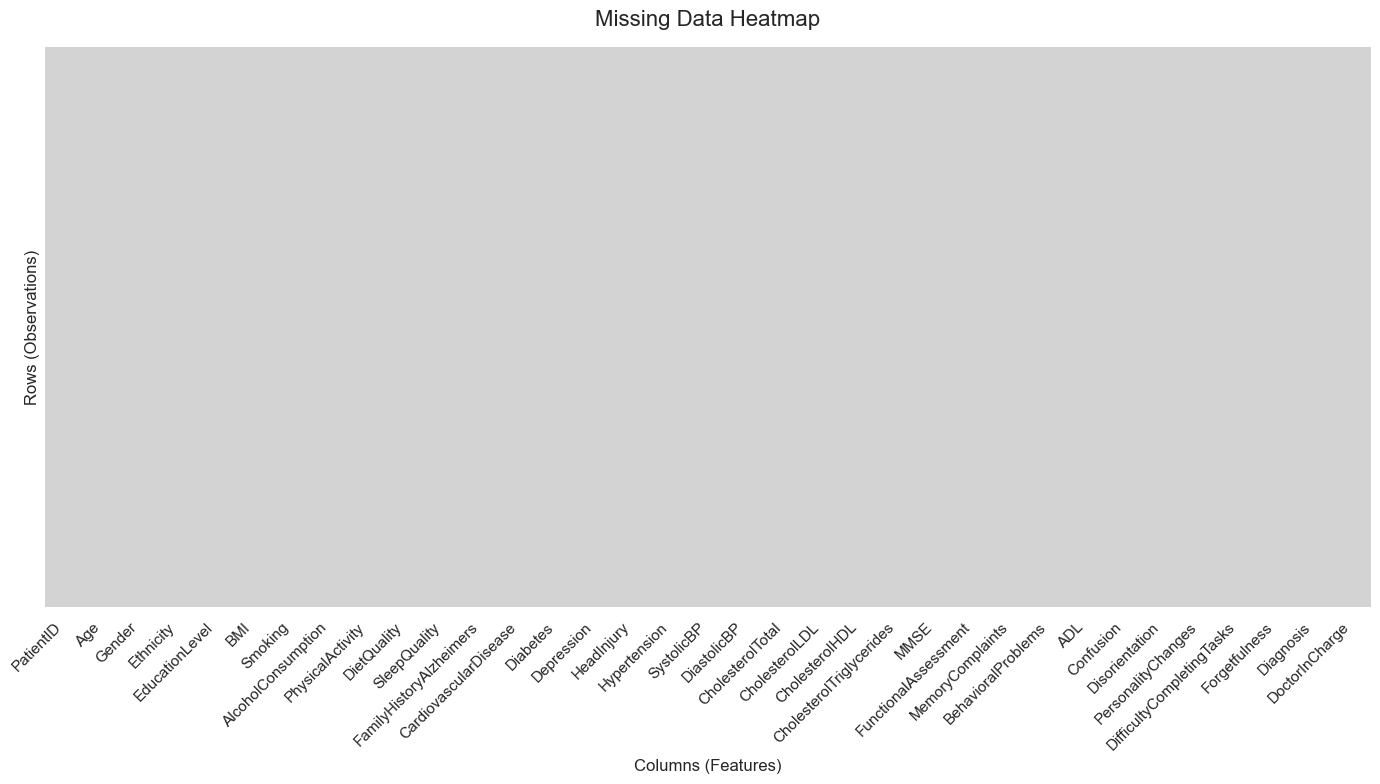

In [57]:
# Create a heatmap to visualize where missing values occur in the dataset
# Allows quick identification of sparsely populated rows or columns

plt.figure(figsize=(14, 8))
sns.heatmap(
    df.isnull(),
    cmap="rocket_r",        # Better contrast for missing vs non-missing
    cbar=False,             # Hide the color bar (not meaningful here)
    yticklabels=False,      # Hide row numbers for performance and clarity
    linewidths=0.5,         # Add light gridlines
    linecolor='lightgrey'   # Grid color
)
plt.title("Missing Data Heatmap", fontsize=16, pad=15)
plt.xlabel("Columns (Features)", fontsize=12)
plt.ylabel("Rows (Observations)", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### Output

We see that the heatmap appears as a solid block of color, which means there are no missing values in the dataset. There are no visible gaps, bands, or patterns that would indicate missing cells across rows or columns.

Even though this heatmap does not show any missing data in this case, we have still included it as part of our data exploration process. A heatmap is a standard and effective tool for identifying where missing values occur and how they are distributed. It is especially helpful in larger or more complex datasets where patterns in missing data may not be obvious from numbers alone.

We conclude that our dataset is complete, but including this step demonstrates that we followed proper data quality checks. In other datasets, missing values are very common, so this visual check is usually an important part of preprocessing.


In [60]:
# Confirm completeness after missing value check
total_missing = df.isnull().sum().sum()

if total_missing == 0:
    print("No missing values detected. Dataset is complete and ready for analysis.")
else:
    print(f"Missing values found: {total_missing}")


No missing values detected. Dataset is complete and ready for analysis.


-------------------------------------------------------------

## Drop Sparse Rows / Impute Values

In [65]:
# Drop rows missing more than 2 values
df_clean = df.dropna(thresh=df.shape[1] - 2)

# Fill numeric columns with column mean
df_clean = df_clean.fillna(df_clean.mean(numeric_only=True))

In [67]:
# Confirm post-cleaning status
print("Shape after cleaning:", df_clean.shape)
df_clean.isnull().sum().sum()

Shape after cleaning: (2149, 35)


0

### Output

We see that the dataset still contains 2149 rows and 35 columns after applying the drop and fill steps. This means that no rows had more than two missing values, so none were removed. We also see that the total number of missing values is zero after filling, which confirms that the imputation step completed successfully.

We conclude that the dataset was already clean and did not require any changes in this step. Still, we include this part of the process because it is an important part of proper preprocessing. In other datasets, this check often reveals incomplete or inconsistent data that must be fixed before analysis. We interpret this as confirmation that the dataset is already well-prepared and complete. 

---------------------------

## Drop irrelevant columns and sanitize text fields

Now that the dataset is clean and complete, we remove columns that are not useful for analysis. 

- PatientID is just an identifier and does not provide predictive value.
- DoctorInCharge is the same in every row and is a text-based administrative field.

We also add a line of code to check for empty string cells (for example, cells that look empty but are technically not null). These are converted into proper NaN values to maintain consistency.

Even though our dataset is already clean, we include this check as a safety measure in case new or external data is added later.


In [43]:
# Drop PatientID and DoctorInCharge if present
columns_to_drop = [col for col in ["PatientID", "DoctorInCharge"] if col in df_clean.columns]
df_clean.drop(columns=columns_to_drop, inplace=True)

# Convert empty strings or whitespace-only cells to NaN
df_clean.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Check again for any remaining missing values
df_clean.isnull().sum()

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

### Output

We removed the PatientID and DoctorInCharge columns from the dataset. These were not useful for modeling and could be safely excluded. We also added a cleaning step to convert any empty text cells to proper NaN values. In this case, no new missing values were created, which confirms that the dataset was already consistent. 
Still, it is a useful step to include as part of a reproducible and future-proof cleaning process.

---------------------------

## Remove Duplicates

After cleaning and structuring the dataset, we perform a final check to see if there are any duplicate rows. Duplicate entries can occur when data is collected from multiple sources or accidentally repeated during preprocessing.

Even if duplicates are rare, keeping them in the dataset can affect the results of analysis or machine learning models by giving too much weight to certain patterns or cases. In this step, we count the number of duplicates and remove them if any are found. This ensures that each patient is represented only once and that the dataset reflects accurate and unbiased information.

Although we did not find any duplicates in this dataset, including this check is part of good data cleaning practice.

In [47]:
# Check and drop duplicates
duplicates = df_clean.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

df_clean = df_clean.drop_duplicates()
print("Shape after removing duplicates:", df_clean.shape)

Duplicate rows: 0
Shape after removing duplicates: (2149, 33)


### Output

We see that the number of duplicate rows is zero. After checking for duplicates and applying the drop function, the dataset still contains 2149 rows and 35 columns. This tells us that all records are unique.We conclude that there are no repeated entries in the dataset. This is important because duplicate rows can distort our results by overrepresenting certain cases or patterns.

We include this check as a standard part of data cleaning. It is common to find duplicated entries due to data entry errors or merging of data from multiple sources. Even when there are no duplicates, confirming it adds confidence to our data quality. To support future steps in the project, we also save this cleaned version of the dataset so we can reuse it without repeating the same steps.

In [50]:
# Save cleaned version
df_clean.to_csv("../data/alzheimers_clean.csv", index=False)
print("Cleaned dataset saved successfully!")

Cleaned dataset saved successfully!


---------------------------

## Notebook Summary

In this notebook, we loaded the raw Alzheimer’s dataset and performed several important data cleaning steps to prepare it for analysis. We began by inspecting the dataset’s structure, including data types and the number of unique values per column. We then checked for missing values both numerically and visually using a heatmap. Although the dataset turned out to be complete, we still applied standard cleaning procedures: dropping rows with too many missing values, imputing missing numeric values using the column mean, and verifying that no missing data remained. We also checked for and confirmed that there were no duplicate records. After validating that the data was clean and consistent, we saved a cleaned version of the dataset to use in the next stages of the project.

In [54]:
import sys
sys.path.append("..")  # Move up one directory

from utils.save_tools import save_notebook_and_summary

save_notebook_and_summary(
    notebook_name="02_data_loading_and_preprocessing",
    summary={
        "description": "Loaded the raw Alzheimer's dataset, inspected structure, checked for missing values and duplicates, dropped sparse rows, imputed missing values using column means, confirmed data completeness, and saved the cleaned dataset.",
        "records_processed": 2149,
        "columns_checked": 35,
        "cleaning_steps": [
            "Inspected data types and unique value counts",
            "Checked for missing values (numeric and heatmap)",
            "Dropped rows with >2 missing values",
            "Imputed numeric missing values with column means",
            "Checked and removed duplicates (none found)"
        ],
        "validation": {
            "missing_values_remaining": 0,
            "duplicates_remaining": 0
        },
        "output_file": "../data/alzheimers_clean.csv"
    }
)

Summary saved to: ../reports/02_data_loading_and_preprocessing_summary_2025-06-06_22-57-18.json


#### This notebook concludes the data cleaning and transformation steps for Alzheimer’s risk prediction. The cleaned data will now be explored further in the next notebook (03_Exploratory_Data_Analysis).

----------------------------------------------